In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

In [6]:
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3263,2023-06-15 00:00:00-04:00,248.399994,258.950012,247.289993,255.899994,160171200,0.0,0.0
3264,2023-06-16 00:00:00-04:00,258.920013,263.600006,257.209991,260.540009,167563700,0.0,0.0
3265,2023-06-20 00:00:00-04:00,261.500000,274.750000,261.119995,274.450012,165611200,0.0,0.0
3266,2023-06-21 00:00:00-04:00,275.130005,276.989990,257.779999,259.459991,211797100,0.0,0.0


In [7]:
tesla_data['High']

0         1.666667
1         2.028000
2         1.728000
3         1.540000
4         1.333333
           ...    
3263    258.950012
3264    263.600006
3265    274.750000
3266    276.989990
3267    265.000000
Name: High, Length: 3268, dtype: float64

In [8]:
import numpy as np
import tensorflow as tf


In [13]:
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

import matplotlib.pyplot as plt

In [14]:
scala_x = MinMaxScaler(feature_range=(0, 1))
scala_y = MinMaxScaler(feature_range=(0, 1))
cols_x = ['Open', 'High', 'Low', 'Volume']
cols_y = ['Close']
scaled_data_x = scala_x.fit_transform(tesla_data[cols_x].values.reshape(-1, len(cols_x)))
scaled_data_y = scala_y.fit_transform(tesla_data[cols_y].values.reshape(-1, len(cols_y)))

In [20]:
pre_day = 30
x_total = []
y_total = []

for i in range(pre_day, len(tesla_data)):
    x_total.append(scaled_data_x[i-pre_day:i])
    y_total.append(scaled_data_y[i])


x_train = np.array(x_total[:len(x_total)-30])
x_test = np.array(x_total[len(x_total)-30:])
y_train = np.array(y_total[:len(y_total)-30])
y_test = np.array(y_total[len(y_total)-30:])

In [21]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3208, 30, 4) (3208, 1) (30, 30, 4) (30, 1)


In [26]:
def create_model():
    model = Sequential()
    model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60))
    model.add(Dropout(0.2))
    model.add(Dense(units=len(cols_y)))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [31]:
model = create_model()

In [44]:
model.fit(x_train, y_train, epochs=100, steps_per_epoch=40, use_multiprocessing=True)

Epoch 1/100
40/40 [==============================] - 6s 163ms/step - loss: 3.7067e-04
Epoch 2/100
40/40 [==============================] - 7s 165ms/step - loss: 3.3718e-04
Epoch 3/100
40/40 [==============================] - 6s 142ms/step - loss: 3.5959e-04
Epoch 4/100
40/40 [==============================] - 6s 160ms/step - loss: 3.4752e-04
Epoch 5/100
40/40 [==============================] - 6s 140ms/step - loss: 3.3961e-04
Epoch 6/100
40/40 [==============================] - 6s 163ms/step - loss: 3.4497e-04
Epoch 7/100
40/40 [==============================] - 6s 139ms/step - loss: 3.1234e-04
Epoch 8/100
40/40 [==============================] - 6s 159ms/step - loss: 3.3712e-04
Epoch 9/100
40/40 [==============================] - 6s 139ms/step - loss: 3.5504e-04
Epoch 10/100
40/40 [==============================] - 6s 158ms/step - loss: 3.6568e-04
Epoch 11/100
40/40 [==============================] - 6s 139ms/step - loss: 3.1678e-04
Epoch 12/100
40/40 [==============================] 

1/1 [==============================] - 0s 42ms/step


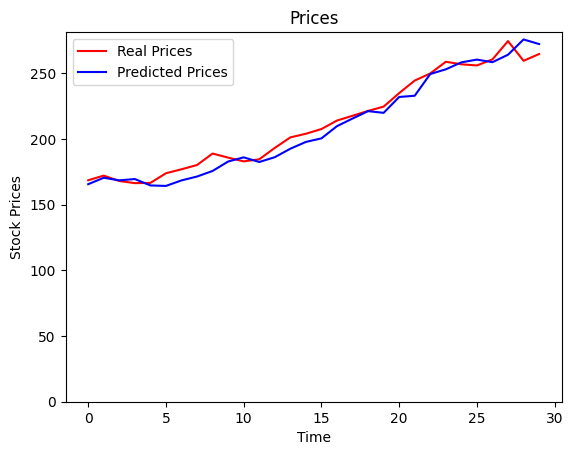

In [45]:
predict_prices = model.predict(x_test)
predict_prices = scala_y.inverse_transform(predict_prices)

real_price = tesla_data[len(tesla_data)-30:]['Close'].values.reshape(-1, 1)
real_price = np.array(real_price)
real_price = real_price.reshape(real_price.shape[0], 1)

plt.plot(real_price, color="red", label=f"Real Prices")
plt.plot(predict_prices, color="blue", label=f"Predicted Prices")
plt.title("Prices")
plt.xlabel("Time")
plt.ylabel("Stock Prices")
plt.ylim(bottom=0)
plt.legend()
plt.show()